In [167]:
import math
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import numpy as np
import pandas as pd
from sklearn.datasets import *
from sklearn.cluster import MeanShift, estimate_bandwidth
from mpl_toolkits.mplot3d import Axes3D
from copy import deepcopy
from PIL import Image
import matplotlib.image as mpimg
import imageio

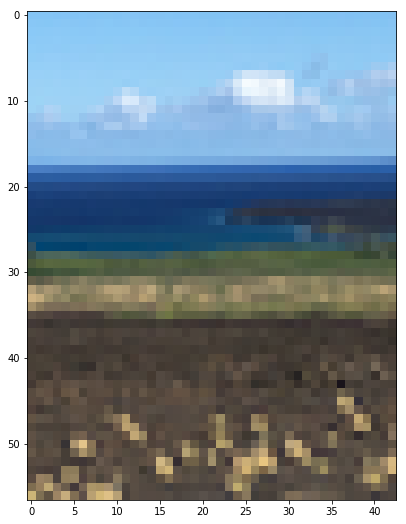

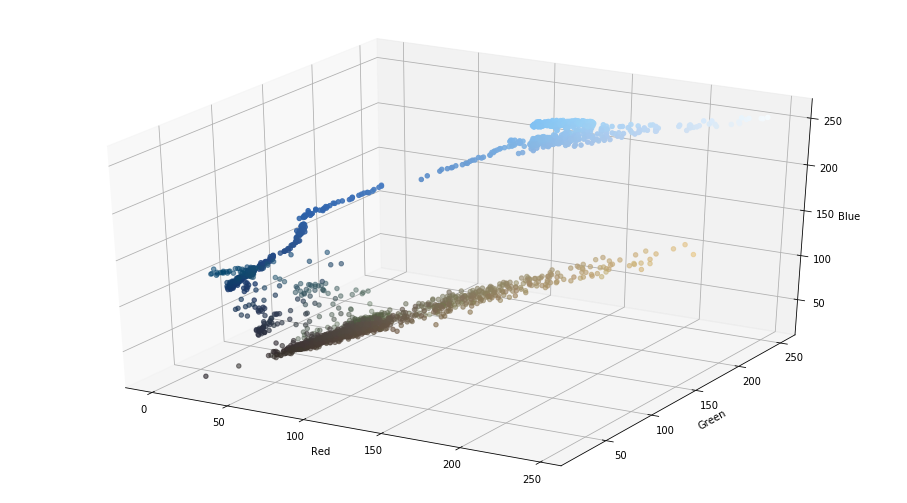

In [168]:
## Read in image, print it's colormap in 3D

image_path = "Coast.png"
im = Image.open(image_path)

## Display original image

img = mpimg.imread(image_path)
imgplot = plt.imshow(img)
plt.show()

## Create 3D Scatterplot 
fig = pyplot.figure()
ax = plt.axes(projection='3d')

imarray = imageio.imread(image_path)

# print(imarray.shape) ### Check vector shape

## Create RGB colorspace vectors using image commands

red, green, blue, opa = list(im.getdata(0)), list(im.getdata(1)), list(im.getdata(2)), list(im.getdata(3)) # (2451 x 1) vectors

r = np.asarray(red)
g = np.asarray(green)
b = np.asarray(blue)
opacity = np.asarray(opa)

cspace = np.stack([r, g, b],axis=-1) # (2451 x 3)  vector

cmap = cspace/255   ### map colors to colormap-compatible rgb input

##Display 3D Colorspace

plt.rcParams['figure.figsize'] = (16, 9)
ax.scatter(r, g, b, c=cmap, marker="o")
ax.set_xlabel("Red")
ax.set_ylabel("Green")
ax.set_zlabel("Blue")
pyplot.show()

In [169]:
##### Section used only for Bandwidth estimate ####

bandwidth = estimate_bandwidth(cspace)

# # Mean Shift on RGB color space

# # Uses SK-Learn built-in commands

# ms = MeanShift(bandwidth=bandwidth)
# ms.fit(cspace)
# labels = ms.labels_
# cluster_centers = ms.cluster_centers_

# labels_unique = np.unique(labels)
# n_clusters_ = len(labels_unique)

# print("number of estimated clusters : %d" % n_clusters_)

In [170]:
## Mean Shift operators

def euclid_distance(x, xi):
    return np.sqrt(np.sum((x - xi)**2))

def neighbourhood_points(X, x_centroid, distance = 5):
    eligible_X = []
    for x in X:
        distance_between = euclid_distance(x, x_centroid)
        # print('Evaluating: [%s vs %s] yield dist=%.2f' % (x, x_centroid, distance_between))
        if distance_between <= distance:
            eligible_X.append(x)
    return eligible_X

def gaussian_kernel(distance, bandwidth):
    val = (1/(bandwidth*math.sqrt(2*math.pi))) * np.exp(-0.5*((distance / bandwidth))**2)
    return val

In [171]:
## Mean Shift parameters

look_distance = 30  # How far to look for neighbours.
kernel_bandwidth = bandwidth  # Kernel parameter.

In [172]:
## Given Mean Shift Code

X = cspace
# print('Initial X: ', X)

past_X = []
n_iterations = 7
for it in range(n_iterations):
    # print('Iteration [%d]' % (it))    

    for i, x in enumerate(X):
        ### Step 1. For each datapoint x ∈ X, find the neighbouring points N(x) of x.
        neighbours = neighbourhood_points(X, x, look_distance)
        # print('[%s] has neighbours [%d]' % (x, len(neighbours)))
        
        ### Step 2. For each datapoint x ∈ X, calculate the mean shift m(x).
        numerator = 0
        denominator = 0
        for neighbour in neighbours:
            distance = euclid_distance(neighbour, x)
            weight = gaussian_kernel(distance, kernel_bandwidth)
            numerator += (weight * neighbour)
            denominator += weight
        
        new_x = numerator / denominator
        
        ### Step 3. For each datapoint x ∈ X, update x ← m(x).
        X[i] = new_x
    
    # print('New X: ', X)
    past_X.append(np.copy(X))

In [173]:
## Update name, and check shape to confirm debug

past_RGB = np.asarray(past_X)

print(past_RGB.shape)

(7, 2451, 3)


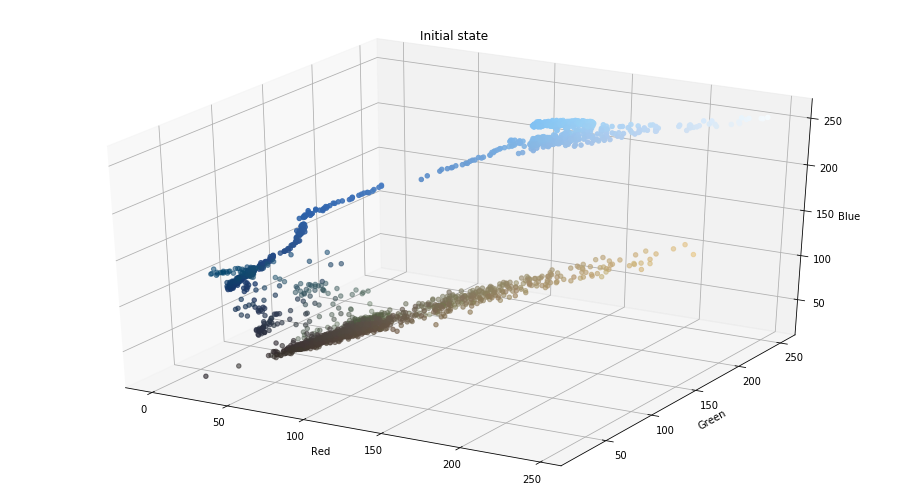

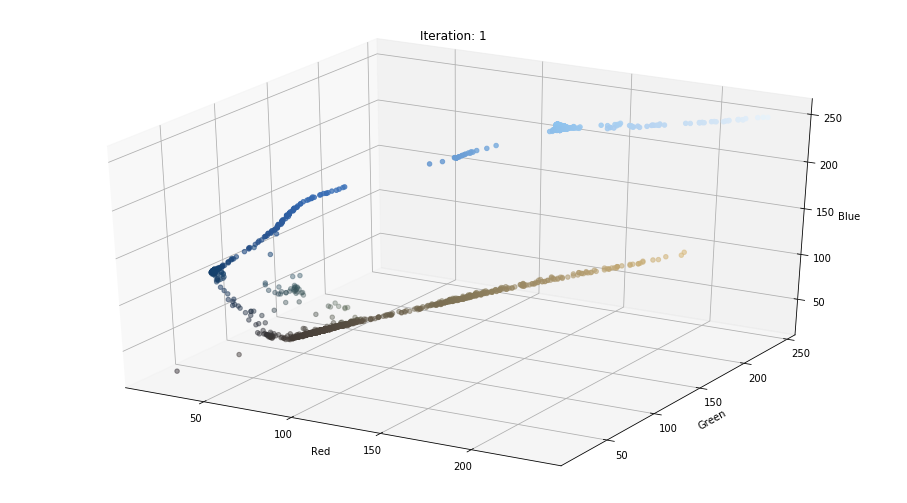

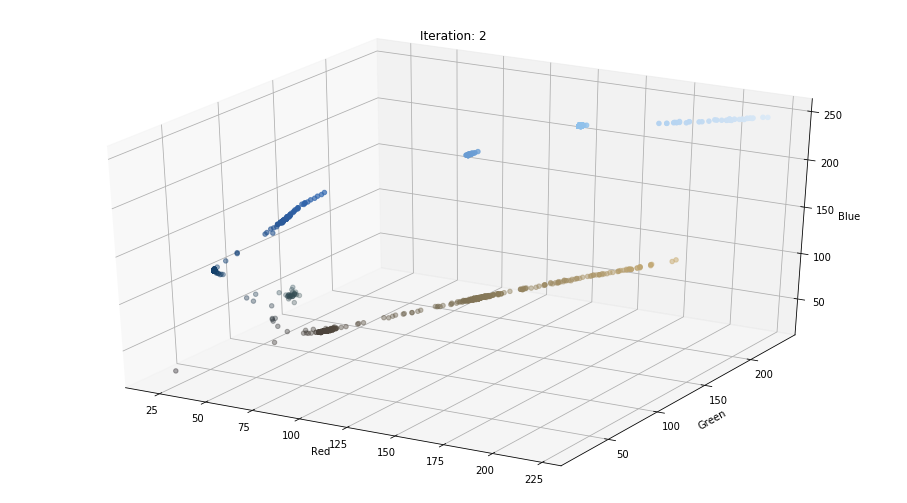

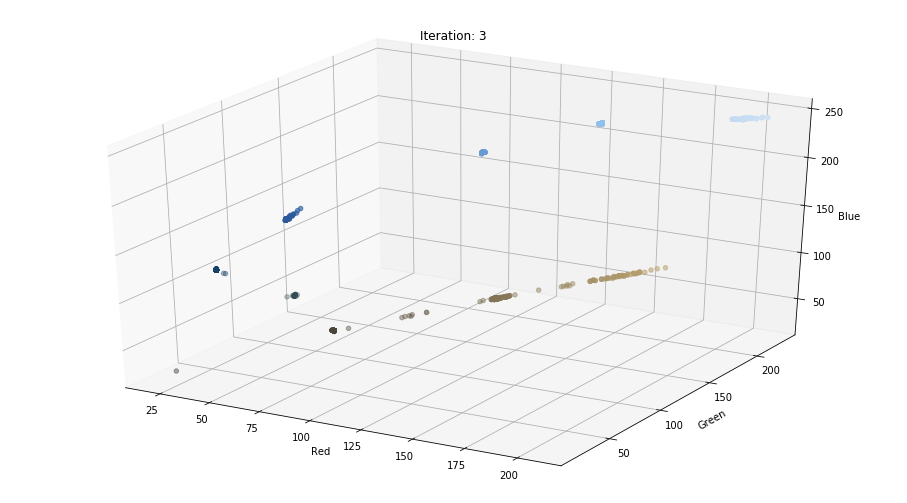

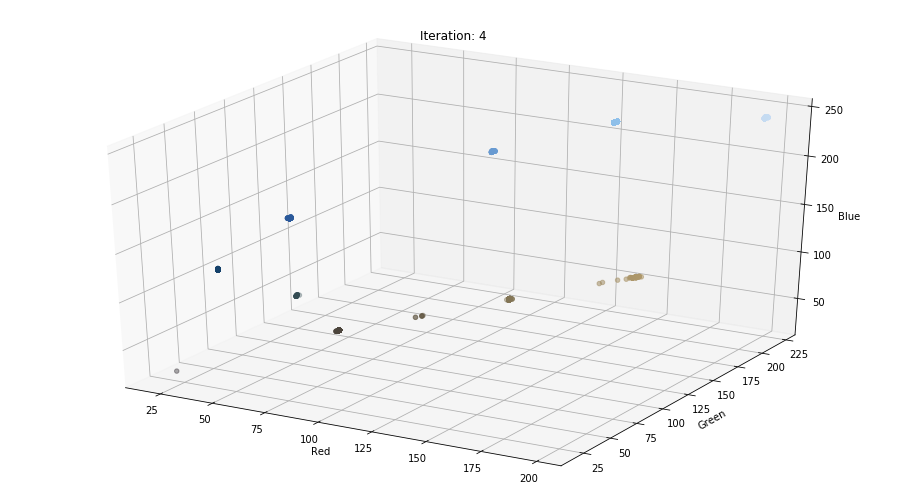

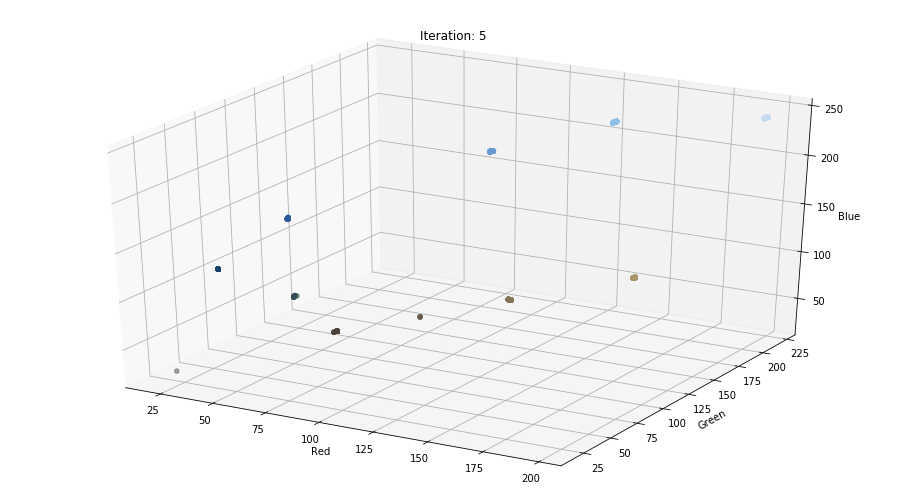

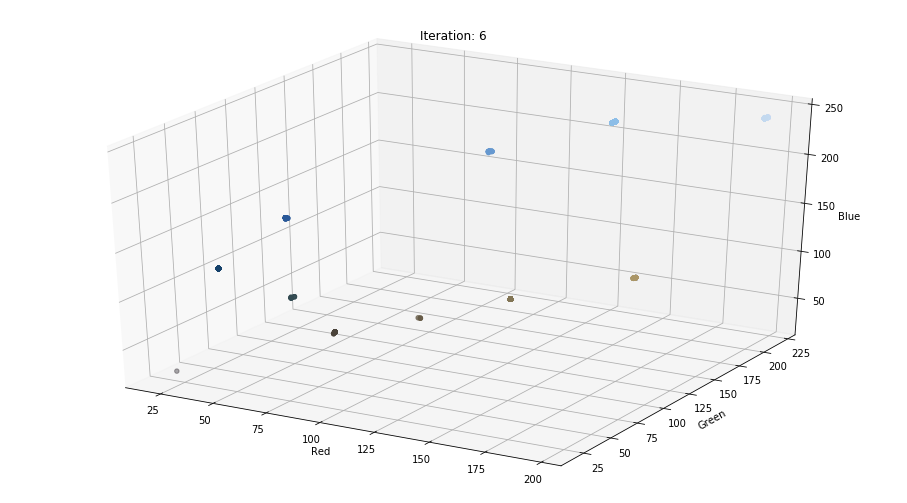

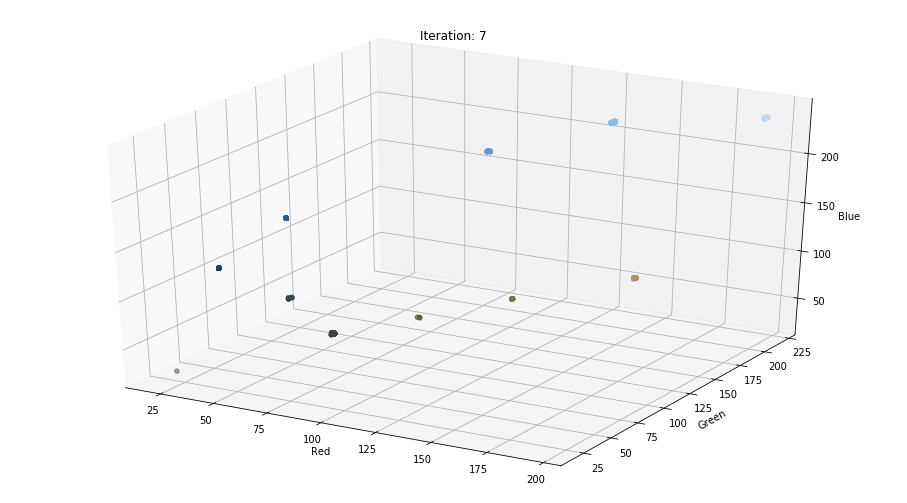

In [174]:
#Replot original figure

fig = pyplot.figure()
plt.rcParams['figure.figsize'] = (16, 9)
ax = plt.axes(projection='3d')
figure.set_size_inches((10, 35))
ax.scatter(r, g, b, c=cmap, marker="o")
ax.set_xlabel("Red")
ax.set_ylabel("Green")
ax.set_zlabel("Blue")
plt.title('Initial state')
pyplot.show()

#Plot each iteration and update color of the point after shifting

for i in range(n_iterations):
    fig = pyplot.figure()
    ax = plt.axes(projection='3d')
    ri = past_RGB[i,:,0]
    gi = past_RGB[i,:,1]
    bi = past_RGB[i,:,2]
    figure_index = i + 2
    cspace = np.stack([ri, gi, bi],axis=-1) # (2451 x 3)  vector
    cmap = cspace/255 
    ax.scatter(ri, gi , bi, c=cmap, marker="o")
    ax.set_xlabel("Red")
    ax.set_ylabel("Green")
    ax.set_zlabel("Blue")
    plt.title('Iteration: %d' % (figure_index - 1))
    pyplot.show()

(57, 43, 3)


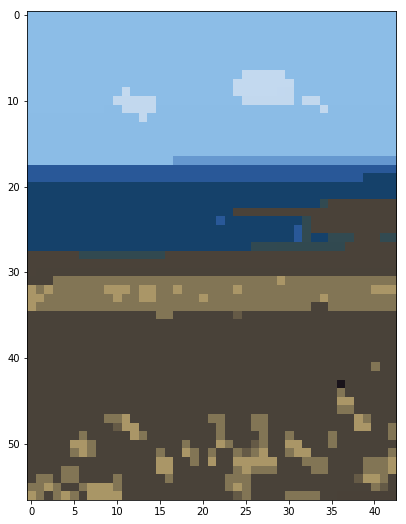

In [180]:
##Reshape final iteration to process back into image

red = np.reshape(ri, [57,43])
green = np.reshape(gi, [57,43])
blue = np.reshape(bi, [57,43])
a = np.reshape(opacity, [57,43])

final_image = np.stack([red, green, blue], axis=-1)

# print(final_image.shape) #### Shape Check

## Get rid of pesky decimal places

final_image = final_image.astype('uint8') 

## Convert back to image

fin_im = Image.fromarray(final_image, 'RGB')

## Plot commands

imgplot = plt.imshow(fin_im)
plt.show()